<a href="https://colab.research.google.com/github/capofwesh20/Masters-Thesis/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [30]:
a1_data = np.loadtxt('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot 1_a1.asc')
a2_data = np.loadtxt('/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2/Rot 1_a2.asc')
a1_mask = (a1_data > 0)
a2_mask = (a2_data > 0)
nzeropixels_a1 = np.sum(a1_mask)
nzeropixels_a2 = np.sum(a2_mask)

#compare the number of zero pixels in the a1 and a2 files...they are the same (443)
np.sum(a2_data == 0)
np.sum(a1_data == 0)
#np.sum(binned_intensity.sum(axis=2) == 0)


0

In [ ]:
np.sum(a2_data == 0)

443

In [ ]:
np.sum(binned_intensity.sum(axis=2) == 0)

22

In [ ]:
np.sum(masked_npyfile3 == 0)

147

In [ ]:
binned_intensity = np.load('/content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27/masked_npyfile6.npy')
# binned_intensity = binned_intensity.sum(axis=2)

In [ ]:
mask3d = np.zeros(binned_intensity.shape)
mask3d[:,:,:] = a1_mask[:,:,np.newaxis]
masked_npyfile7 = binned_intensity*mask3d

In [ ]:
masked_npyfile3 = masked_npyfile.sum(axis=2)

In [ ]:
# Assuming `masked_npyfile7` is a variable already defined in the environment

# Define the path to save the file
save_path = '/content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2/masked_npyfile1'

# Save the numpy array to the specified path
np.save(save_path, masked_npyfile1)

print(f"File successfully saved to {save_path}")


File successfully saved to /content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27/masked_npyfile1


In [ ]:
masked_npyfile7.shape

(128, 128, 256)

In [ ]:
flim_data_folder = '/content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27'

# List all files in the folder
flim_files = [f for f in os.listdir(flim_data_folder) if f.endswith('.npy')]


In [ ]:
len(flim_files)

1

In [ ]:
import numpy as np

# Assuming you have an input image with shape (height, width, time_gates)
# For example, load the input image (FLIM decay data) from a .npy file
decay_data = np.load('/content/drive/MyDrive/OneDrive_1_10-24-2024/2024-03-12 SCC74A High O2/F+- 1_Ch2.npy')  # Shape could be (128, 128, 256)

# Calculate the maximum photon count for each pixel across all time gates
# This operation will take the maximum value along the time axis (axis=2)
max_photon_count = np.max(decay_data, axis=2)

# The result (max_photon_count) will have shape (height, width), showing the max count for each pixel
print("Max Photon Count for Each Pixel:")
print(max_photon_count)

# To check the global maximum photon count in the entire image:
global_max_photon_count = np.max(max_photon_count)
print(f"Global Maximum Photon Count in the Image: {global_max_photon_count}")

# You can also find the pixel location of the maximum photon count
max_photon_pixel_location = np.unravel_index(np.argmax(max_photon_count), max_photon_count.shape)
print(f"Pixel Location with Maximum Photon Count: {max_photon_pixel_location}")


Max Photon Count for Each Pixel:
[[28 11 15 ... 38 48 38]
 [28 12 19 ... 40 28 36]
 [29 12 17 ... 30 39 36]
 ...
 [34 40 35 ... 50 55 43]
 [34 29 37 ... 37 41 37]
 [28 33 32 ... 29  3  0]]
Global Maximum Photon Count in the Image: 161
Pixel Location with Maximum Photon Count: (70, 124)


In [ ]:
offset = np.load('/content/drive/MyDrive/OneDrive_1_10-24-2024/2024-03-12 SCC74A High O2/Rot 7_offset.npy')
np.max(offset)

32.931

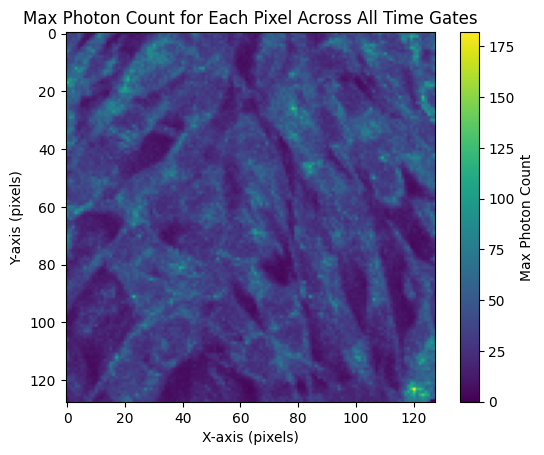

In [ ]:
import matplotlib.pyplot as plt

# Visualize the max photon counts using a heatmap
plt.imshow(max_photon_count, cmap='viridis')
plt.colorbar(label='Max Photon Count')
plt.title('Max Photon Count for Each Pixel Across All Time Gates')
plt.xlabel('X-axis (pixels)')
plt.ylabel('Y-axis (pixels)')
plt.show()


In [11]:

# Directory containing the images
flim_data_folder = '/content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2'

# List all files in the folder
flim_files = [f for f in os.listdir(flim_data_folder) if f.endswith('.npy')]

# Function to bin nearest neighbor pixels
def bin_pixels(f, xcenter, ycenter, nbin):
    """ This function combines the decays of nbin nearest neighbor pixels
    f is a two or three dimensional array x,y (,t)
    xcenter,ycenter is the center coordinate
    nbin is the number of nearest neighbors
    the function returns the total binned intensity or decay
    """
    s = f.shape
    nr = s[0]
    nc = s[1]
    xmin = xcenter - nbin if (xcenter > nbin) else 0
    ymin = ycenter - nbin if (ycenter > nbin) else 0
    xmax = xcenter + nbin + 1 if (xcenter < nr - nbin) else nr
    ymax = ycenter + nbin + 1 if (ycenter < nc - nbin) else nc

    if len(s) == 3:
        nt = s[2]
        total = np.zeros(nt)
    else:
        total = 0
    for x in range(int(xmin), int(xmax)):
        for y in range(int(ymin), int(ymax)):
            total = np.add(f[x][y], total)
    return total

# Function to bin all pixels in an image
def bin_all_pixels(f, nbin):
    print("Creating binned image")
    xpix, ypix = f.shape[0:2]
    bin_image = np.zeros(f.shape)
    for x in range(xpix):
        for y in range(ypix):
            bin_image[x][y] = bin_pixels(f, x, y, nbin)
    return bin_image

# Iterate through each file, apply binning, calculate intensity, and save results
for file_name in flim_files:
    # Load the decay data
    file_path = os.path.join(flim_data_folder, file_name)
    decay_data = np.load(file_path)

    # Apply binning to the entire image with a specified value for nbin (e.g., nbin=1)
    nbin = 1
    binned_data = bin_all_pixels(decay_data, nbin)

    # Save the binned image as a .npy file
    binned_file_name = f"binned_{file_name}"
    binned_file_path = os.path.join(flim_data_folder, binned_file_name)
    np.save(binned_file_path, binned_data)

    print(f"Binned image saved as {binned_file_name}")


Creating binned image
Binned image saved as binned_Control 5_Ch2.npy
Creating binned image
Binned image saved as binned_Control 4_Ch2.npy
Creating binned image
Binned image saved as binned_Control 3_Ch2.npy
Creating binned image
Binned image saved as binned_Control 2_Ch2.npy
Creating binned image
Binned image saved as binned_Control 1_Ch2.npy
Creating binned image
Binned image saved as binned_F++ 5_Ch2.npy
Creating binned image
Binned image saved as binned_F++ 4_Ch2.npy
Creating binned image
Binned image saved as binned_F++ 3_Ch2.npy
Creating binned image
Binned image saved as binned_F++ 2_Ch2.npy
Creating binned image
Binned image saved as binned_F++ 1_Ch2.npy
Creating binned image
Binned image saved as binned_Control 7_Ch2.npy
Creating binned image
Binned image saved as binned_Control 6_Ch2.npy
Creating binned image
Binned image saved as binned_F+- 5_Ch2.npy
Creating binned image
Binned image saved as binned_F+- 4_Ch2.npy
Creating binned image
Binned image saved as binned_F+- 3_Ch2.n

In [ ]:
d = np.load('/content/drive/MyDrive/OneDrive_2024-10-15/2024-02-29 SCC74A High O2 - thresh 27/Control 1_t2.npy')

In [ ]:
d.shape

(128, 128, 256)

In [ ]:
intensity_data = np.sum(d, axis=2)

    # Find the max and min intensity values and their pixel locations
max_intensity = np.max(intensity_data)
min_intensity = np.min(intensity_data)

    # Get the pixel locations for the minimum intensity values
min_intensity_location = np.unravel_index(np.argmin(intensity_data), intensity_data.shape)

    # Print the results for each image
print(f"Image: {file_name}")
print(f"Max Intensity: {max_intensity}")
print(f"Min Intensity: {min_intensity} at Pixel Location: {min_intensity_location}\n")


Image: Control 6_Ch2.npy
Max Intensity: 15960.0
Min Intensity: 266.0 at Pixel Location: (0, 53)



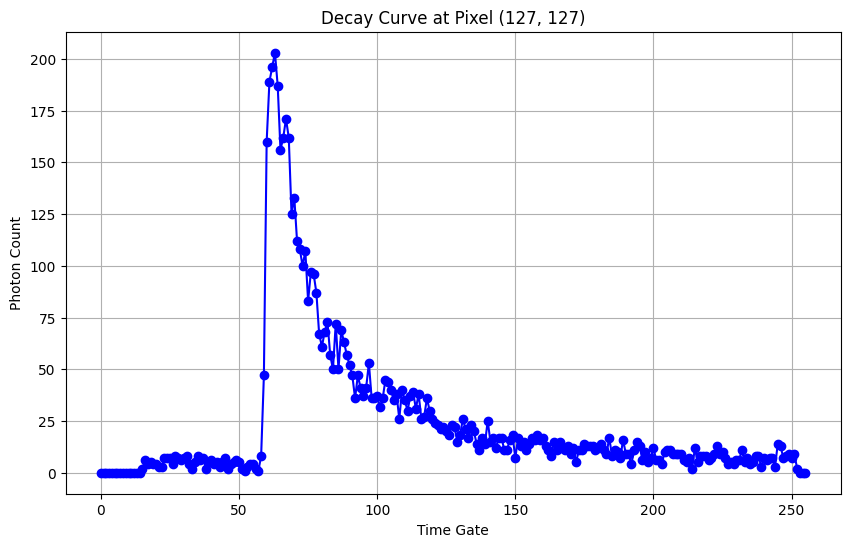

In [ ]:
# Extract the decay data for pixel (191, 213)
pixel_decay_data_127_127 = d[127, 109, :]

# Plot the decay graph for pixel (127, 127)
plt.figure(figsize=(10, 6))
plt.plot(pixel_decay_data_127_127, marker='o', linestyle='-', color='b')
plt.xlabel('Time Gate')
plt.ylabel('Photon Count')
plt.title('Decay Curve at Pixel (127, 127)')
plt.grid(True)
plt.show()


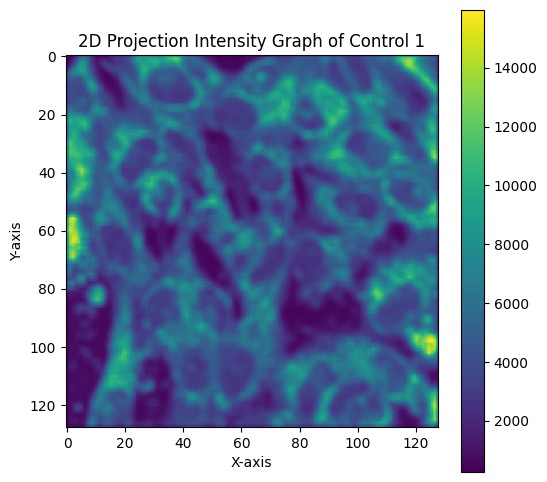

In [ ]:
intensity = d.sum(axis=2)
# Plot the normalized intensity projection
plt.figure(figsize=(6, 6))
plt.imshow(intensity, cmap='viridis')
plt.colorbar()
plt.title('2D Projection Intensity Graph of Control 1')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [ ]:
# Initialize an array for the normalized decay data with the same shape
normalized_data = np.zeros_like(d)

# Iterate through each pixel and normalize the decay curve by the sum of photon counts
for x in range(d.shape[0]):
    for y in range(d.shape[1]):
        total_photon_count = np.max(d[x, y, :])

        # Avoid division by zero
        if total_photon_count > 0:
            normalized_data[x, y, :] = d[x, y, :] / total_photon_count




In [ ]:
normalized_data.shape

(128, 128, 256)

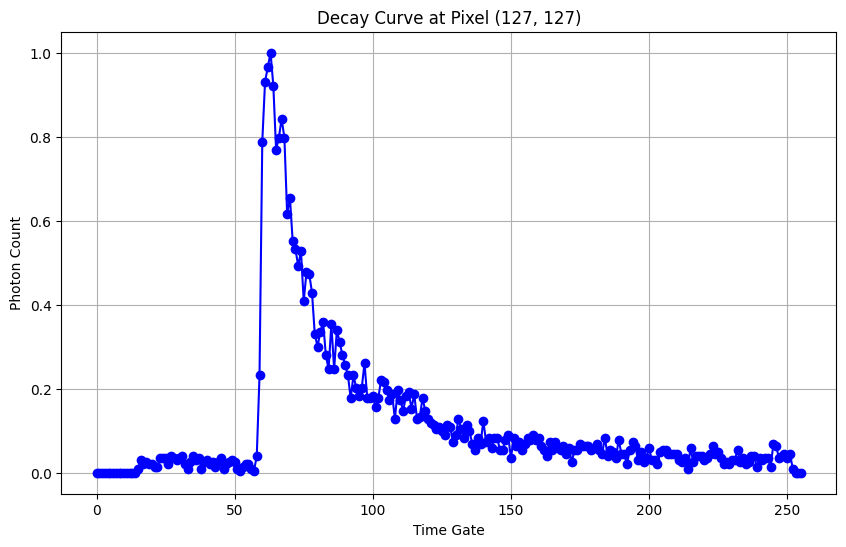

In [ ]:
# Extract the decay data for pixel (191, 213)
pixel_decay_data_127_127 = normalized_data[127, 109, :]

# Plot the decay graph for pixel (127, 127)
plt.figure(figsize=(10, 6))
plt.plot(pixel_decay_data_127_127, marker='o', linestyle='-', color='b')
plt.xlabel('Time Gate')
plt.ylabel('Photon Count')
plt.title('Decay Curve at Pixel (127, 127)')
plt.grid(True)
plt.show()


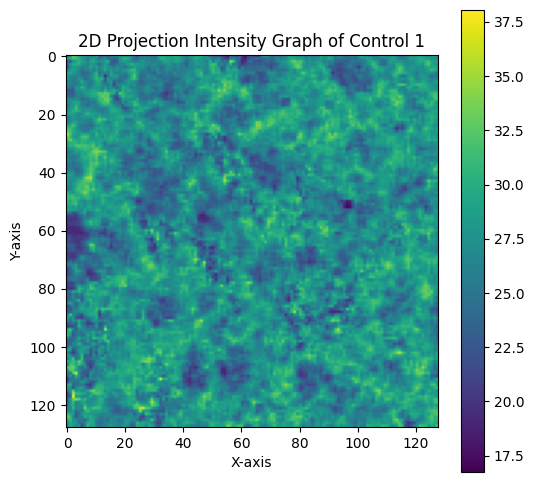

In [ ]:
intensity = normalized_data.sum(axis=2)
# Plot the normalized intensity projection
plt.figure(figsize=(6, 6))
plt.imshow(intensity, cmap='viridis')
plt.colorbar()
plt.title('2D Projection Intensity Graph of Control 1')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [12]:
path_to_files = '/content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2/*.asc'

file_paths = glob.glob(path_to_files)

# Loop through each file path
for file_path in file_paths:

    data = np.loadtxt(file_path)

    output_file_path = file_path.replace('.asc', '.npy')


    np.save(output_file_path, data)

    print(f"Saved {output_file_path}")


Saved /content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2/Control 2_a1.npy
Saved /content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2/Control 1_offset.npy
Saved /content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2/Control 1_a2.npy
Saved /content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2/Control 1_t2.npy
Saved /content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2/Control 2_a2.npy
Saved /content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2/Control 2_offset.npy
Saved /content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2/Control 1_t1.npy
Saved /content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2/Control 3_a1.npy
Saved /content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2/Control 2_t2.npy
Saved /content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2/Control 1_a1.npy
Saved /content/drive/MyDrive/One

In [13]:
# Function to process the files
def process_files(directory):
    # Loop through all files in the specified directory
    for filename in os.listdir(directory):
        if filename.endswith('t1.npy'):
            # Load the file
            array = np.load(os.path.join(directory, filename))
            # Perform the division
            array = array / 1000
            # Save the modified array back
            np.save(os.path.join(directory, filename), array)
        elif filename.endswith('t2.npy'):
            # Load the file
            array = np.load(os.path.join(directory, filename))
            # Perform the division
            array = array / 1000
            # Save the modified array back
            np.save(os.path.join(directory, filename), array)
        # elif filename.endswith('offset.npy'):
        #     # Load the file
        #     array = np.load(os.path.join(directory, filename))
        #     # Perform the division
        #     array = array / 1000
        #     # Save the modified array back
        #     np.save(os.path.join(directory, filename), array)



# Specify the directory containing the .npy files
directory = '/content/drive/MyDrive/OneDrive_2024-11-13 (1)/2024-03-12 SCC74A High O2'

# Call the function to process the files
process_files(directory)


In [ ]:
view = np.load('/content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27/Control 2_offset.npy')

In [ ]:
view.max()

0.013876699999999999

Control 7
F++ 6
F+- 5_a1
Rot 4_a2

In [22]:
epsilon = 1e-10  # Small value to avoid division by zero

def process_a1_a2_ratio(directory):
    # Loop through all files in the specified directory
    for control_num in range(1, 8):  # Assuming 7 controls
        # Load the corresponding a1 and a2 files for each control
        a1_file = f'Rot {control_num}_a1.npy'
        a2_file = f'Rot {control_num}_a2.npy'
        # Construct the full file paths
        a1_path = os.path.join(directory, a1_file)
        a2_path = os.path.join(directory, a2_file)


        if os.path.exists(a1_path) and os.path.exists(a2_path):
            # Load the a1 and a2 arrays
            a1_array = np.load(a1_path)
            a2_array = np.load(a2_path)

            # Compute the ratio
            ratio = a1_array / (a1_array + a2_array + epsilon)

            # Save the ratio as a new .npy file
            ratio_file = f'Rot {control_num}_ratio.npy'
            ratio_path = os.path.join(directory, ratio_file)
            np.save(ratio_path, ratio)

            print(f'Saved {ratio_file} successfully.')
        else:
            print(f'Missing a1 or a2 file for Control {control_num}.')

# Specify the directory containing the .npy files
directory = '/content/drive/MyDrive/OneDrive_2024-11-13/2024-02-29-SCC74A Low O2'

# Call the function to process the files
process_a1_a2_ratio(directory)


Saved Rot 1_ratio.npy successfully.
Saved Rot 2_ratio.npy successfully.
Saved Rot 3_ratio.npy successfully.
Saved Rot 4_ratio.npy successfully.
Saved Rot 5_ratio.npy successfully.
Saved Rot 6_ratio.npy successfully.
Saved Rot 7_ratio.npy successfully.


In [ ]:

# Load the .npy files
sigD = np.load('/content/drive/MyDrive/OneDrive_1_10-24-2024/2024-03-12 SCC74A Low O2/binned_Control 3_Ch2.npy')
t1 = np.load('/content/drive/MyDrive/OneDrive_1_10-24-2024/2024-03-12 SCC74A Low O2/Control 3_t1.npy')
t2 = np.load('/content/drive/MyDrive/OneDrive_1_10-24-2024/2024-03-12 SCC74A Low O2/Control 3_t2.npy')
rT = np.load('/content/drive/MyDrive/OneDrive_1_10-24-2024/2024-03-12 SCC74A Low O2/Control 3_ratio.npy')
A0 = np.load('/content/drive/MyDrive/OneDrive_1_10-24-2024/2024-03-12 SCC74A Low O2/Control 3_offset.npy')

# Save them into an .npz file
np.savez('/content/drive/MyDrive/collation/data1_control3.npz', sigD=sigD, t1=t1, t2=t2, ratio=rT, offset=A0)




In [ ]:
def save_control_data_to_npz(directory, output_directory, num_controls=7):
    os.makedirs(output_directory, exist_ok=True)
    for control_num in range(1, num_controls + 1):
        # Construct file paths for the necessary .npy files for each control
        sigD_file = f'masked_npyfile{control_num}.npy'
        t1_file = f'Control {control_num}_t1.npy'
        t2_file = f'Control {control_num}_t2.npy'
        rT_file = f'Control {control_num}_ratio.npy'
        #A0_file = f'Control {control_num}_offset.npy'

        # Create full paths to the files
        sigD_path = os.path.join(directory, sigD_file)
        t1_path = os.path.join(directory, t1_file)
        t2_path = os.path.join(directory, t2_file)
        rT_path = os.path.join(directory, rT_file)
        #A0_path = os.path.join(directory, A0_file)

        # Check if all files exist before proceeding
        if os.path.exists(sigD_path) and os.path.exists(t1_path) and os.path.exists(t2_path) and os.path.exists(rT_path):
            # Load the .npy files
            sigD = np.load(sigD_path)
            t1 = np.load(t1_path)
            t2 = np.load(t2_path)
            rT = np.load(rT_path)
            #A0 = np.load(A0_path)

            # Create the output file name for the .npz file
            output_file = os.path.join(output_directory, f'data3_Control{control_num}.npz')

            # Save them into an .npz file
            np.savez(output_file, sigD=sigD, t1=t1, t2=t2, ratio=rT)

            print(f'Successfully saved: {output_file}')
        else:
            print(f'Missing files for Control {control_num}, skipping...')

# Specify the directory containing the .npy files and the output directory
input_directory = '/content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27'
output_directory = '/content/drive/MyDrive/collationwork4'

# Call the function to process all controls
save_control_data_to_npz(input_directory, output_directory)


Successfully saved: /content/drive/MyDrive/collationwork4/data3_Control1.npz
Successfully saved: /content/drive/MyDrive/collationwork4/data3_Control2.npz
Successfully saved: /content/drive/MyDrive/collationwork4/data3_Control3.npz
Successfully saved: /content/drive/MyDrive/collationwork4/data3_Control4.npz
Successfully saved: /content/drive/MyDrive/collationwork4/data3_Control5.npz
Successfully saved: /content/drive/MyDrive/collationwork4/data3_Control6.npz
Successfully saved: /content/drive/MyDrive/collationwork4/data3_Control7.npz


In [ ]:
# import os
# import numpy as np

# def save_control_data_to_npz(directory, output_directory, num_controls=7):
#     # Ensure the output directory exists
#     os.makedirs(output_directory, exist_ok=True)

#     for control_num in range(1, num_controls + 1):
#         # Construct file paths for the necessary .npy files for each control
#         sigD_file = f'masked_npyfile{control_num}.npy'
#         t1_file = f'Control {control_num}_t1.npy'
#         t2_file = f'Control {control_num}_t2.npy'
#         a1_file = f'Control {control_num}_a1.npy'
#         a2_file = f'Control {control_num}_a2.npy'
#         A0_file = f'Control {control_num}_offset.npy'

#         # Create full paths to the files
#         sigD_path = os.path.join(directory, sigD_file)
#         t1_path = os.path.join(directory, t1_file)
#         t2_path = os.path.join(directory, t2_file)
#         a1_path = os.path.join(directory, a1_file)
#         a2_path = os.path.join(directory, a2_file)
#         A0_path = os.path.join(directory, A0_file)

#         # Check if all files exist before proceeding
#         if all(os.path.exists(path) for path in [sigD_path, t1_path, t2_path, a1_path, a2_path, A0_path]):
#             # Load the .npy files
#             sigD = np.load(sigD_path)
#             t1 = np.load(t1_path)
#             t2 = np.load(t2_path)
#             a1 = np.load(a1_path)
#             a2 = np.load(a2_path)
#             A0 = np.load(A0_path)

#             # Create the output file name for the .npz file
#             output_file = os.path.join(output_directory, f'data3_Control{control_num}.npz')

#             # Save them into an .npz file
#             np.savez(output_file, sigD=sigD, t1=t1, t2=t2, a1=a1, a2=a2, offset=A0)

#             print(f'Successfully saved: {output_file}')
#         else:
#             print(f'Missing files for Control {control_num}, skipping...')

# # Specify the directory containing the .npy files and the output directory
# input_directory = '/content/drive/MyDrive/OneDrive_2024-10-26/2024-02-29 SCC74A High O2 - thresh 27'
# output_directory = '/content/drive/MyDrive/collationwork2'

# # Call the function to process all controls
# save_control_data_to_npz(input_directory, output_directory)


Successfully saved: /content/drive/MyDrive/collationwork1/data3_Control1.npz
Successfully saved: /content/drive/MyDrive/collationwork1/data3_Control2.npz
Successfully saved: /content/drive/MyDrive/collationwork1/data3_Control3.npz
Successfully saved: /content/drive/MyDrive/collationwork1/data3_Control4.npz
Successfully saved: /content/drive/MyDrive/collationwork1/data3_Control5.npz
Successfully saved: /content/drive/MyDrive/collationwork1/data3_Control6.npz
Successfully saved: /content/drive/MyDrive/collationwork1/data3_Control7.npz


In [ ]:
import os

files_in_directory = os.listdir(input_directory)
print("Files in the directory:")
print(files_in_directory)


Files in the directory:
['Control 1_Ch2.npy', 'Control 1_t2.asc', 'Control 1_offset.asc', 'Control 1_t1.asc', 'Control 1_photons.asc', 'Control 1_a2.asc', 'Control 1_a1.asc', 'Control 2_Ch2.npy', 'Control 2_t1.asc', 'Control 2_t2.asc', 'Control 2_photons.asc', 'Control 2_a1.asc', 'Control 2_a2.asc', 'Control 2_offset.asc', 'Control 3_a2.asc', 'Control 3_offset.asc', 'Control 4_a1.asc', 'Control 3_photons.asc', 'Control 3_t1.asc', 'Control 3_a1.asc', 'Control 3_t2.asc', 'Control 3_Ch2.npy', 'Control 5_Ch2.npy', 'Control 4_t2.asc', 'Control 4_Ch2.npy', 'Control 5_a1.asc', 'Control 4_a2.asc', 'Control 4_photons.asc', 'Control 4_t1.asc', 'Control 5_a2.asc', 'Control 4_offset.asc', 'Control 5_t2.asc', 'Control 6_Ch2.npy', 'Control 5_photons.asc', 'Control 5_t1.asc', 'Control 5_offset.asc', 'Control 6_a2.asc', 'Control 6_a1.asc', 'Control 6_offset.asc', 'Control 6_photons.asc', 'Control 7_offset.asc', 'Control 6_t2.asc', 'Control 7_a2.asc', 'Control 7_a1.asc', 'Control 7_t2.asc', 'Control 7_

In [ ]:
p_data = output_directory = '/content/drive/MyDrive/collation' # Directory with training data
stacks = os.listdir(p_data)
numS = len(stacks)

In [ ]:
numS

108

In [ ]:
new = np.load('/content/drive/MyDrive/training_set/data_Control_3.npz')

In [ ]:
new.keys()

KeysView(NpzFile '/content/drive/MyDrive/training_set/data_Control_7.npz' with keys: sigD, t1, t2, ratio, offset)

In [ ]:
new['t2'].max()

3.62308

In [ ]:
new = np.load('/content/drive/MyDrive/collation/data_Control_6.npz')

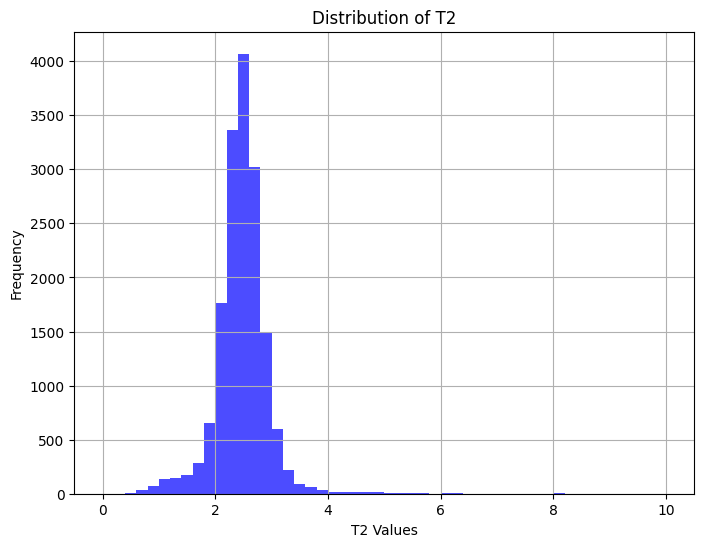

In [ ]:
# Extract the 't2' values
t2_values = new['t2']

# Plot the distribution of T2
plt.figure(figsize=(8, 6))
plt.hist(t2_values.flatten(), bins=50, range=(0, 10), color='blue', alpha=0.7)
plt.title('Distribution of T2')
plt.xlabel('T2 Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


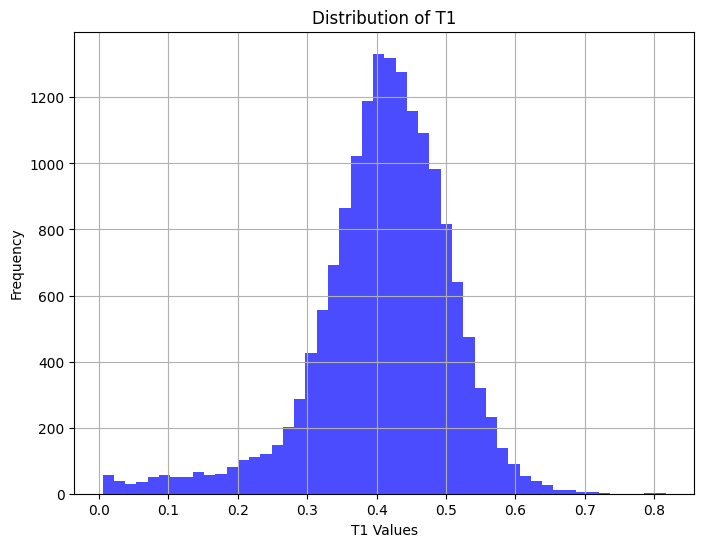

In [ ]:
# Extract the 't2' values
t2_values = new['t1']

# Plot the distribution of T2
plt.figure(figsize=(8, 6))
plt.hist(t2_values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of T1')
plt.xlabel('T1 Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
f_data = '/content/drive/MyDrive/training_set' # Directory with training data
stacks = os.listdir(f_data)  # List all the files in the directory (assumed to be `.npz` files)
numS = len(stacks)  # Count the number of files (stacks) in the directory
numS

7

In [ ]:
stacks

['.ipynb_checkpoints',
 'data_Control_2.npz',
 'data_Control_3.npz',
 'data_Control_4.npz',
 'data_Control_5.npz',
 'data_Control_6.npz',
 'data_Control_7.npz']

In [ ]:
f_data = '/content/drive/MyDrive/training_set' # Directory with training data
stacks = os.listdir(f_data)


# Define the patch sizes
patch_size_3d = (32, 32, 256)
patch_size_2d = (32, 32)

# Initialize lists to store patches
patches_tpsfD = []
patches_t1 = []
patches_t2 = []
patches_tR = []
patches_A0 = []

# Function to extract 3D patches (keeping the temporal axis intact)
def extract_patches_3d(array, patch_size):
    patches = []
    for i in range(0, array.shape[0] - patch_size[0] + 1, patch_size[0]):
        for j in range(0, array.shape[1] - patch_size[1] + 1, patch_size[1]):
            patch = array[i:i+patch_size[0], j:j+patch_size[1], :]
            patches.append(patch)
    return patches

# Function to extract 2D patches
def extract_patches_2d(array, patch_size):
    patches = []
    for i in range(0, array.shape[0] - patch_size[0] + 1, patch_size[0]):
        for j in range(0, array.shape[1] - patch_size[1] + 1, patch_size[1]):
            patch = array[i:i+patch_size[0], j:j+patch_size[1]]
            patches.append(patch)
    return patches

# Load data and create patches
for d in stacks:
    # Load NPZ file
    data = np.load(os.path.join(f_data, d))

    # Extract patches from each file
    patches_tpsfD.extend(extract_patches_3d(data['sigD'], patch_size_3d))
    patches_t1.extend(extract_patches_2d(data['t1'], patch_size_2d))
    patches_t2.extend(extract_patches_2d(data['t2'], patch_size_2d))
    patches_tR.extend(extract_patches_2d(data['ratio'], patch_size_2d))
    patches_A0.extend(extract_patches_2d(data['offset'], patch_size_2d))

# Convert lists of patches to numpy arrays
patches_tpsfD = np.array(patches_tpsfD)
patches_t1 = np.array(patches_t1)
patches_t2 = np.array(patches_t2)
patches_tR = np.array(patches_tR)
patches_A0 = np.array(patches_A0)

In [ ]:
# Add an extra dimension
tpsfD = np.expand_dims(patches_tpsfD, axis=-1)
t1 = np.expand_dims(patches_t1, axis=-1)
t2 = np.expand_dims(patches_t2, axis=-1)
tR = np.expand_dims(patches_tR, axis=-1)
A0 = np.expand_dims(patches_A0, axis=-1)

# Print the shapes of the patch arrays
print("Patches for tpsfD:", tpsfD.shape)
print("Patches for t1:", t1.shape)
print("Patches for t2:", t2.shape)
print("Patches for tR:", tR.shape)
print("Patches for A0:", A0.shape)

Patches for tpsfD: (96, 32, 32, 256, 1)
Patches for t1: (96, 32, 32, 1)
Patches for t2: (96, 32, 32, 1)
Patches for tR: (96, 32, 32, 1)
Patches for A0: (96, 32, 32, 1)


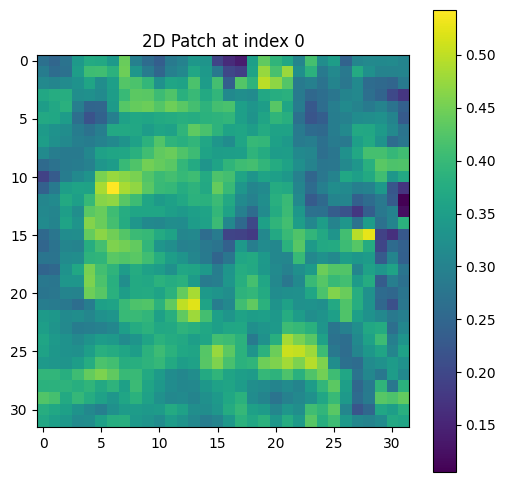

In [ ]:
def visualize_2d_patches(patches_2d, patch_index=0):

    plt.figure(figsize=(6, 6))
    plt.imshow(patches_2d[patch_index], cmap='viridis')
    plt.colorbar()
    plt.title(f'2D Patch at index {patch_index}')
    plt.show()

# Example usage: Visualize the first 2D patch from t1 patches
visualize_2d_patches(patches_t1, patch_index=0)


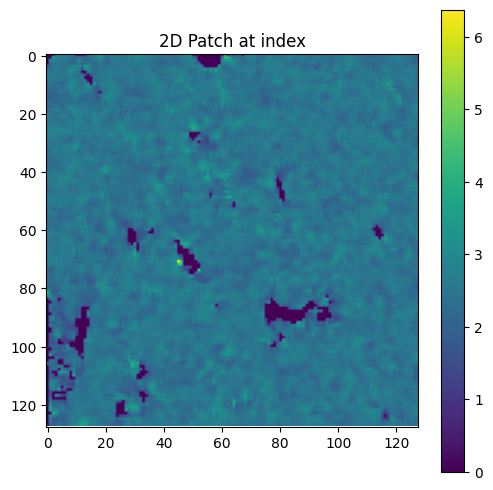

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(d, cmap='viridis')
plt.colorbar()
plt.title(f'2D Patch at index')
plt.show()

In [ ]:
d

array([[0.     , 0.     , 0.     , ..., 2.47706, 2.05619, 1.89209],
       [0.     , 0.     , 3.45293, ..., 2.27466, 2.05521, 2.01089],
       [0.     , 3.11687, 2.84896, ..., 2.15397, 2.06706, 2.05727],
       ...,
       [0.     , 2.59382, 1.83815, ..., 2.60959, 2.44145, 2.50472],
       [0.     , 2.68252, 1.71425, ..., 2.494  , 2.33185, 2.4185 ],
       [0.     , 2.20802, 1.84033, ..., 2.39951, 2.23063, 2.47228]])

In [ ]:
d.max()

6.37638

In [ ]:
d.min()

0.0

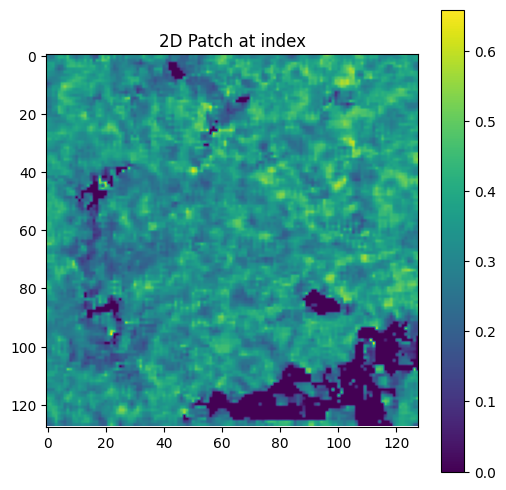

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(view, cmap='viridis')
plt.colorbar()
plt.title(f'2D Patch at index')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Creating a histogram of the Tau1 values, flattening to ensure a single dataset
plt.hist(tR[n, :, :, 0].flatten(), range=(0, 1), color='blue', alpha=0.7)

# Add titles and labels
plt.title('Distribution of TR values for Control 1 from GT')
plt.xlabel('TR Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()
